# Data Visualization for Bank Churn Data

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [6]:
df_num = df.copy()

In [7]:
cat_var = ['Surname','Geography','Gender']
num_var = df.columns.difference(cat_var)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
for features in cat_var:
    le=LabelEncoder()
    df_num[features] = le.fit_transform(df[features])

C:\Users\deepa\AppData\Local\Temp\ipykernel_25308\1309991678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


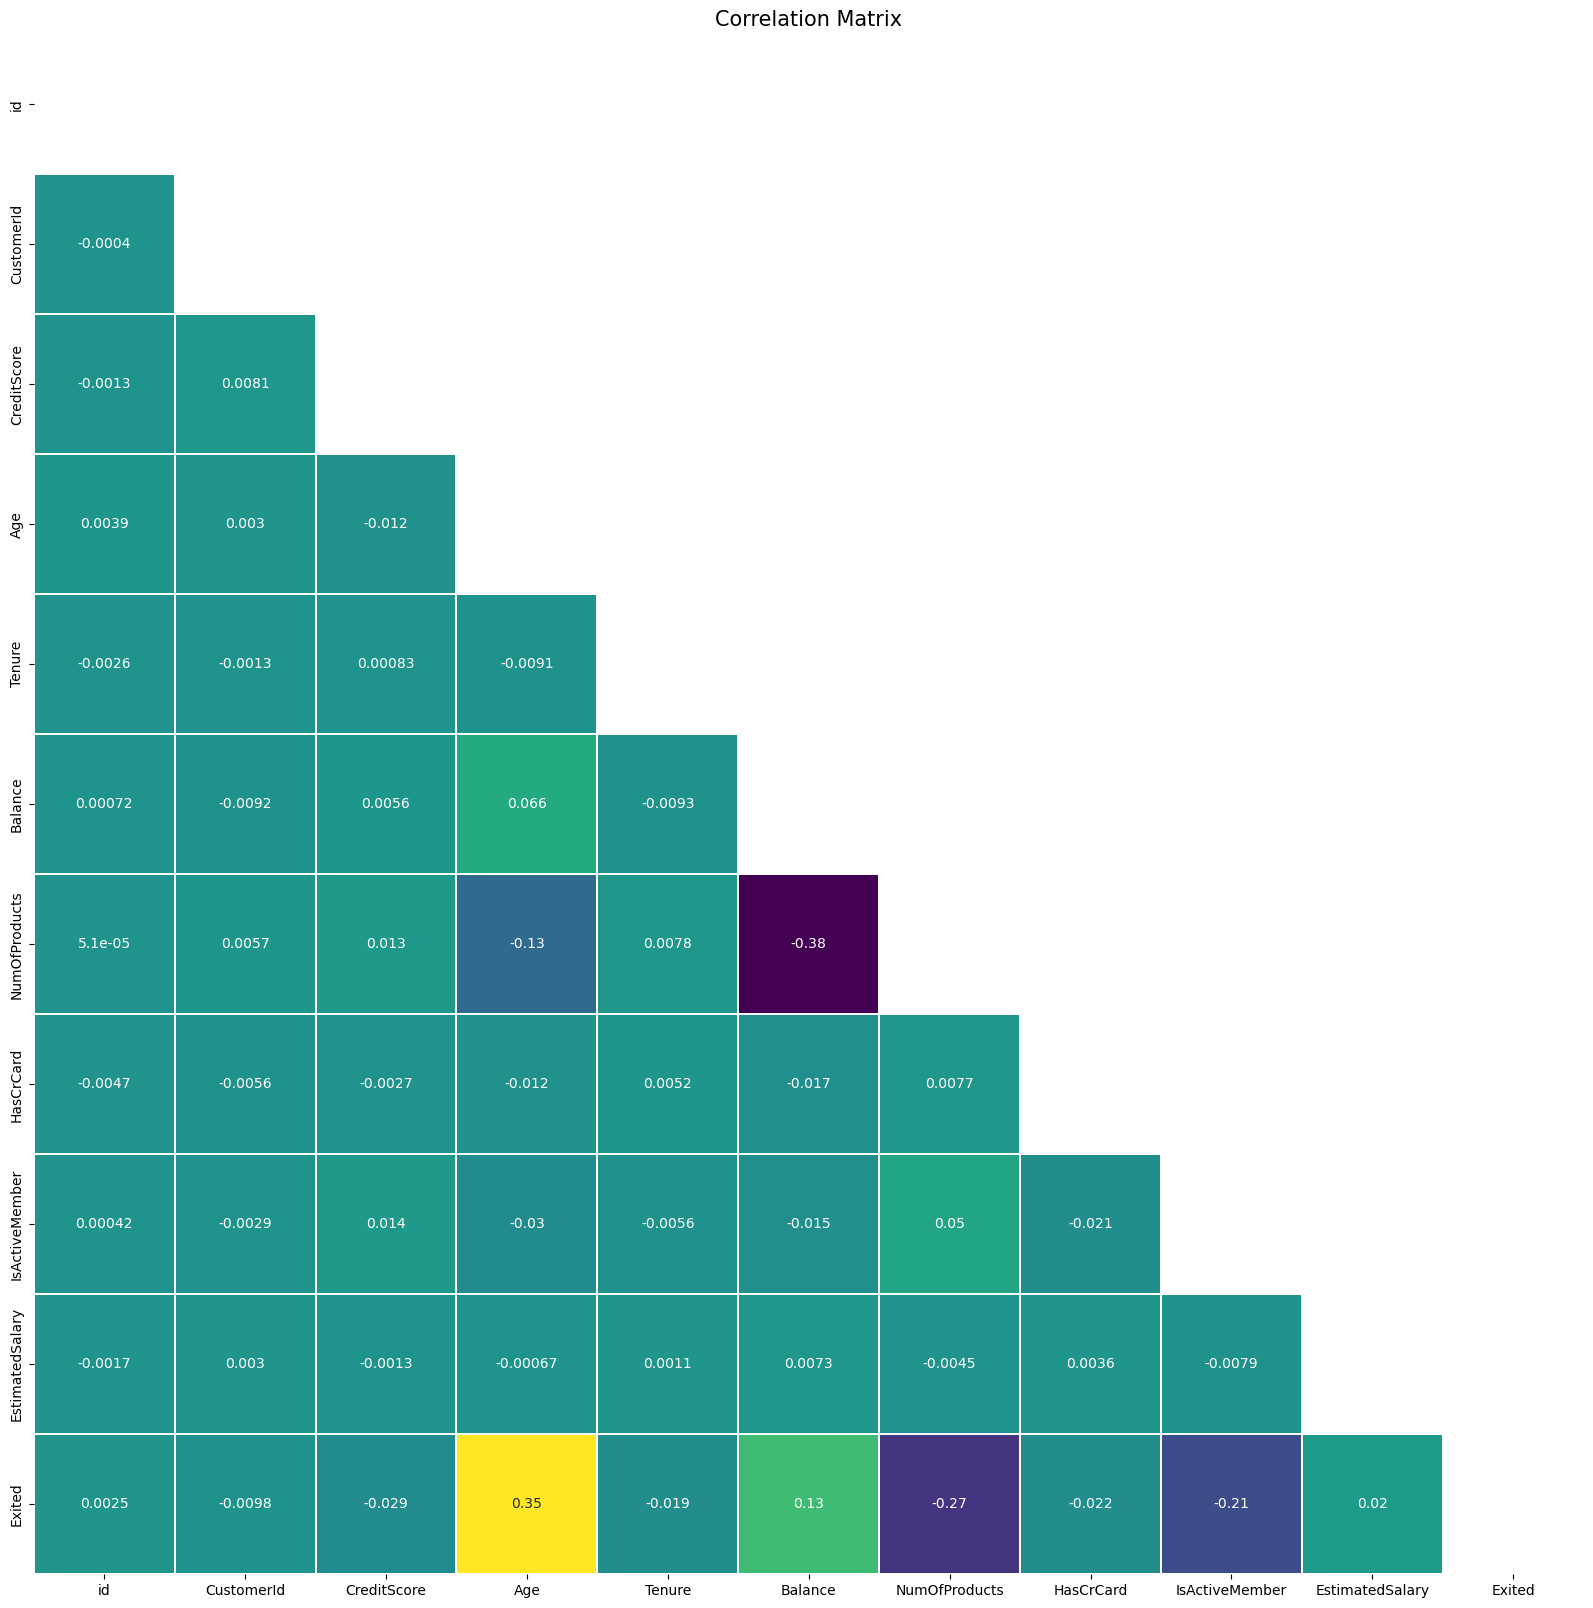

In [10]:
fig,ax= plt.subplots(figsize=(20,20))
corr_matrix = df.corr(method='spearman')
sb.heatmap(corr_matrix,annot=True,linewidths=0.1,cbar=False, ax=ax, mask=np.triu(np.ones_like(corr_matrix,dtype=bool)),cmap='viridis')

ax.set_title("Correlation Matrix",fontsize=15)
plt.show()

The Correlation Matrix Shows:  
- a strong correlation between Age and Exited
- a strong correlation between Balance and NumOfProducts
- a strong correlation between NumOfProducts and Exited
- a strong correlation between IsActiveMemeber and Exited
- a small correlation between NumofProducts and Age
- a tiny correlation between IsActiveMember and NumOfProducts

Let's explore these realations


## Class Imbalance

Here we check the inbalance in data for variabel "Exited" using a pie chart

In [11]:
targets=df["Exited"].unique()
classes=[df[(df["Exited"] == target)]["id"].count() for target in targets]

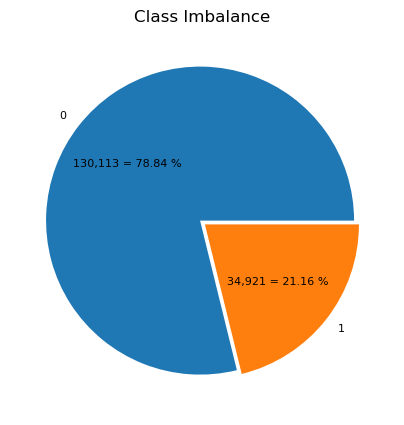

In [12]:
fix,ax = plt.subplots(figsize=(5,5))
plt.pie(classes, labels=targets, explode=[0.02]*2,autopct= lambda x: "{:,.0f} = {:,.2f} %".format(x*sum(classes)/100,x),textprops={'fontsize':8})
ax.set_title('Class Imbalance')
plt.show()


Here we can see that the 78.84% remains a customer of the bank where rest 21.16% exits from the bank. 
This shows that data is highly imbalanced.

## Churn by Geography

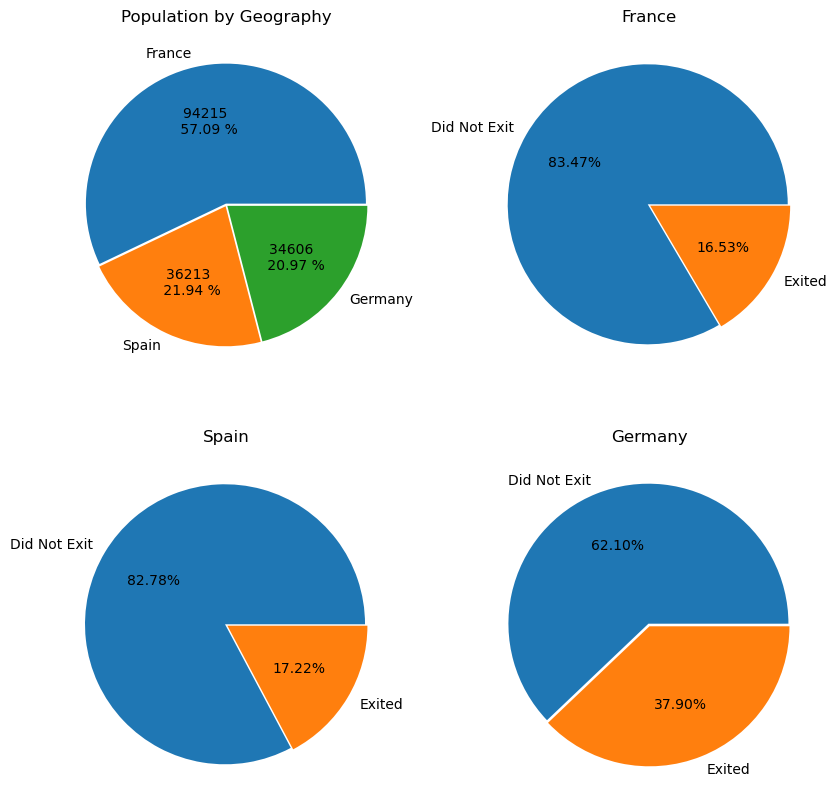

In [13]:
geo_target = df['Geography'].unique()
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

geo_count = [df[(df['Geography'] == target)]['id'].count() for target in geo_target]


ax= ax.flatten()

_ = ax[0].pie(geo_count, labels=geo_target, autopct = lambda x:"{:.0f} \n {:.2f} %".format(x*sum(geo_count)/100,x),explode=[0.01]*3)
_ = ax[0].set_title("Population by Geography")
for i, target in enumerate (geo_target):
    
    classes = [df[(df['Geography']==target) & (df['Exited']==0)]['id'].count(), df[(df['Geography']==target) & (df['Exited']==1)]['id'].count()]
    
    label = ['Did Not Exit','Exited']
    
    _= ax[i+1].pie(classes,labels = label, autopct = "%.2f%%", explode= [0.01]*len(label))
    _= ax[i+1].set_title(target)

We see that Most of the people in germany exits, this can be an important feature for predictions

## Gender distribution across different countries

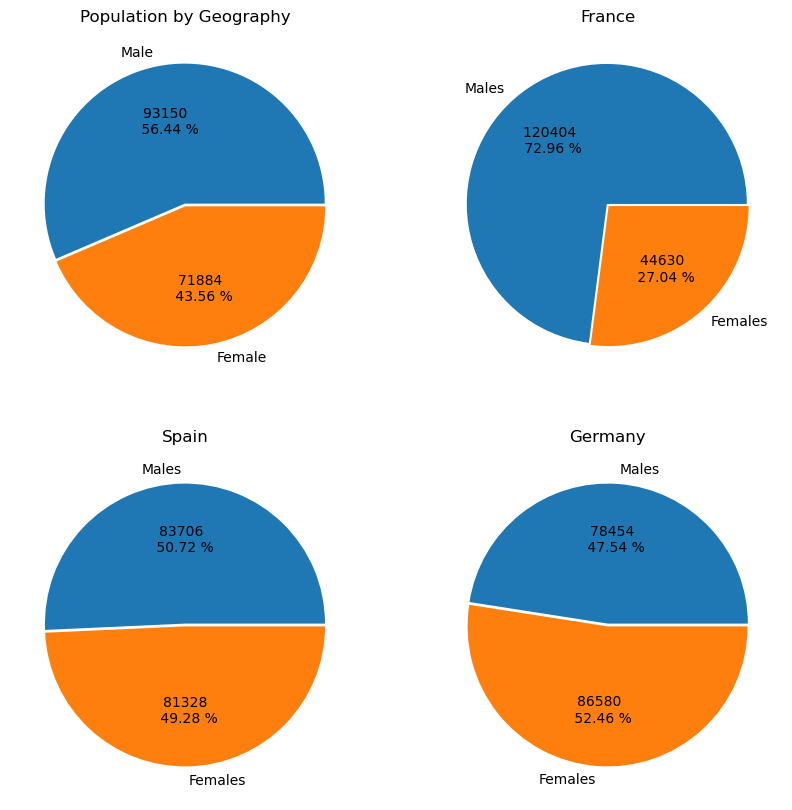

In [14]:
gen_target = df['Gender'].unique()
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

gen_count = [df[(df['Gender'] == target)]['id'].count() for target in gen_target]


ax= ax.flatten()

_ = ax[0].pie(gen_count, labels=gen_target, autopct = lambda x:"{:.0f} \n {:.2f} %".format(x*sum(gen_count)/100,x),explode=[0.01]*2)
_ = ax[0].set_title("Population by Geography")

for i, target in enumerate (geo_target):
    
    classes = [df[(df['Geography']==target) & (df['Gender']=='Male')]['id'].count(), df[(df['Gender']=='Female') & (df['Exited']==1)]['id'].count()]
    
    label = ['Males','Females']
    
    _= ax[i+1].pie(classes,labels = label, autopct =  lambda x:"{:.0f} \n {:.2f} %".format(x*sum(gen_count)/100,x), explode= [0.01]*len(label))
    _= ax[i+1].set_title(target)

- The percentage of Male population (56%) is slightly larger than the Female population (44%)

- For France we see a high percentage (73%) of Males compares to only 27% of females. Whereas for Spain and Germany, the gender distribution is more or less equal.

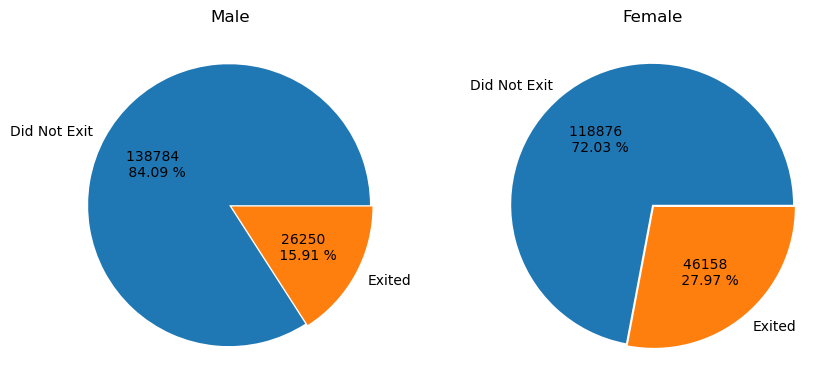

In [15]:
gen_target = df['Gender'].unique()

fix, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,6))

gen_count = [df[(df["Gender"]==target)]['id'].count() for target in gen_target]

ax=ax.flatten()


for i, target in enumerate (gen_target):
    
    classes = [df[(df['Gender']==target) & (df['Exited']==0)]['id'].count(), df[(df['Gender']==target) & (df['Exited']==1)]['id'].count()]
    
    label = ['Did Not Exit','Exited']
    
    _= ax[i].pie(classes,labels = label, autopct =  lambda x:"{:.0f} \n {:.2f} %".format(x*sum(gen_count)/100,x), explode= [0.01]*len(label))
    _= ax[i].set_title(target)

The above pie chart shows that larger number of females tend to terminate bank's services than Males. Approx 28% of the female population exits whereas only 15.9% of the males exits the bank services

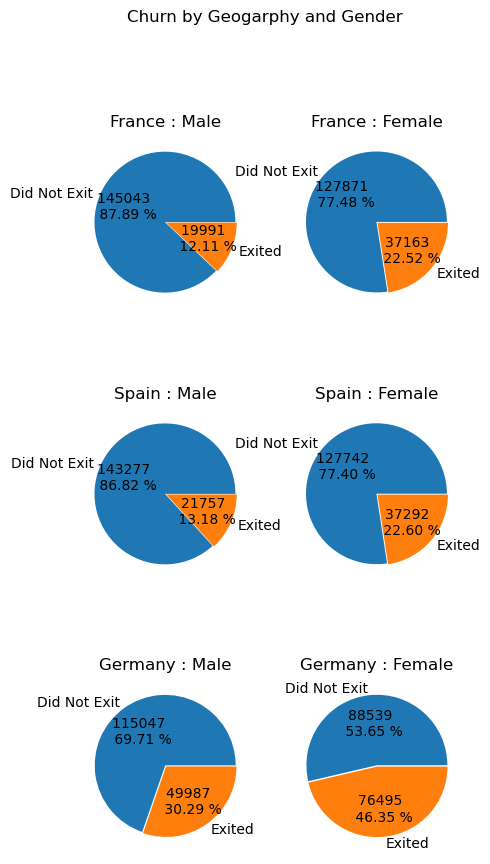

In [16]:
gen_target = df['Gender'].unique()
geo_target = df["Geography"].unique()

fix, ax = plt.subplots(nrows=3, ncols=2,figsize=(5,10))

gen_count = [df[(df["Gender"]==target)]['id'].count() for target in gen_target]

ax=ax.flatten()

#_ = ax[0].pie(gen_count, labels=gen_target, autopct = lambda x:"{:.0f} \n {:.2f} %".format(x*sum(gen_count)/100,x),explode=[0.01]*2)
#_ = ax[0].set_title("Data by Gender")

temp=0
for j in range(3):
    for i, target in enumerate (gen_target):
    

        classes = [df[(df['Gender']==target) & (df['Exited']==0) & (df['Geography']==geo_target[j])]['id'].count(), df[(df['Gender']==target) & (df['Exited']==1) & (df['Geography']==geo_target[j])]['id'].count()]

        label = ['Did Not Exit','Exited']

        _= ax[temp].pie(classes,labels = label, autopct =  lambda x:"{:.0f} \n {:.2f} %".format(x*sum(gen_count)/100,x), explode= [0.01]*len(label))
        _= ax[temp].set_title("{} : {}".format(geo_target[j],target))
        temp+=1
        plt.suptitle("Churn by Geogarphy and Gender")

- We see the same trend of Higher number of exits in germany as well as higher number of exits by females compared to males. 
- One thing to notice here is percentage of females exiting in Germany is only about twice as that of percentage of females exiting in any other countries, percentage of males exiting in germany is 2.3 times higher than percentage of males exiting in other countries

In [50]:
def dens_hist_exit(var,bins=100):
    fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(8,6),gridspec_kw={'hspace':0.25})
    ax=ax.flatten()
    sb.set_style("whitegrid")
    _= sb.kdeplot(df[df["Exited"]==0][var], fill = True, label = "Not Exited", ax=ax[0])
    _= sb.kdeplot(df[df["Exited"]==1][var], fill = True, label = "Exited", ax=ax[0])
    _= ax[0].set_title("{} Distribution".format(var))
    _= ax[0].set_xlabel("")
    _= ax[0].legend()

    _= ax[1].hist(df[df["Exited"]==0][var], fill = True, label = "Not Exited", bins=bins,alpha=0.5)
    _= ax[1].hist(df[df["Exited"]==1][var], fill = True, label = "Exited", bins=bins,alpha=0.5)
    _= ax[1].legend()
    #_= ax[1].set_title("{} Distribution".format(var))
    _= ax[1].set_xlabel(var)
    _= ax[1].set_ylabel("Frequency")
    
def dens_hist_gen(var,var2,bins=100):
    
    cond=df[var2].unique()
    
    
    fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(8,6),gridspec_kw={'hspace':0.25})
    ax=ax.flatten()
    
    for i in range(len(cond)):
        #print(cond[i])
        _= sb.kdeplot(df[df[var2]==cond[i]][var], fill = True, label = cond[i], ax=ax[0])
        _= ax[1].hist(df[df[var2]==cond[i]][var], fill = True, label = cond[i], bins=bins,alpha=0.5)
        
    #_= sb.kdeplot(df[df[var2]==cond[i]][var], fill = True, label = var2, ax=ax[0])
    _= ax[0].set_title("{} Distribution by {}".format(var,var2))
    _= ax[0].set_xlabel("")
    _= ax[0].legend()
    
    
    #_= ax[1].hist(df[df[var2]==condp[i]][var], fill = True, label = var2, bins=100,alpha=0.5)
    _= ax[1].legend()
    #_= ax[1].set_title("{} Distribution by {}".format(var, var2))
    _= ax[1].set_xlabel(var)
    _= ax[1].set_ylabel("Frequency")
    

# Credit Score

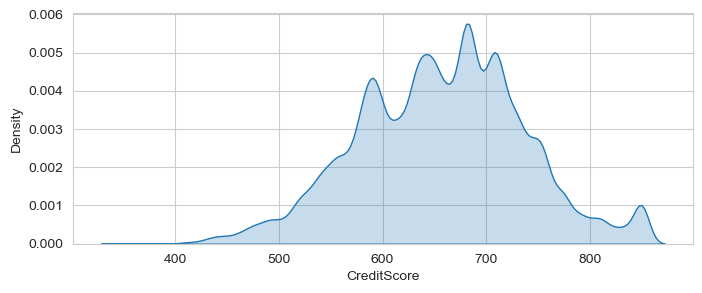

In [51]:
fig, ax =plt.subplots(figsize=(8,3))
sb.set_style("darkgrid")
_= sb.kdeplot(df["CreditScore"],fill=True)

We see that very small population has crediscore in the range 0-580, a good portion of population lies within the creditscore of 580-700 and very few people lies in the very high credit score region. Based on this information we can categorize people based on low, medium and high Creditscore

In [52]:
def credit_score(score):
    if score<=570:
        return 'low'
    elif score<=710:
        return 'medium'
    else:
        return 'high'
    
df["CrScoreCat"] = df["CreditScore"].apply(credit_score)


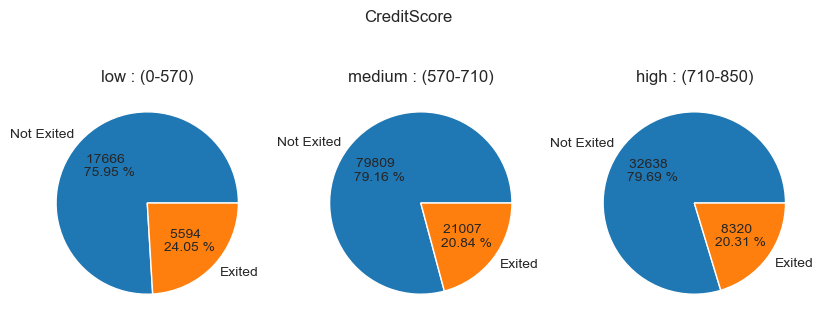

In [53]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
ax=ax.flatten()
Cr_cat = ['low','medium','high']
Cr_score = ['0-570','570-710','710-850']

for i in range(3):
    target = [df[(df["CrScoreCat"]==Cr_cat[i]) & (df["Exited"]==0)]["id"].count(),df[(df["CrScoreCat"]==Cr_cat[i]) & (df["Exited"]==1)]["id"].count()]
    label  = ['Not Exited','Exited']
    _= ax[i].pie(target,labels=label,autopct=lambda x:"{:.0f} \n {:.2f} %".format(x*sum(target)/100,x))
    _=ax[i].set_title("{} : ({})".format(Cr_cat[i],Cr_score[i]))
    _=plt.suptitle("CreditScore")
    

The percentage of people exited is more or less same throughout different credit score groups with percentage of exited population in low credit-scoore being slightly higher than other credit score groups

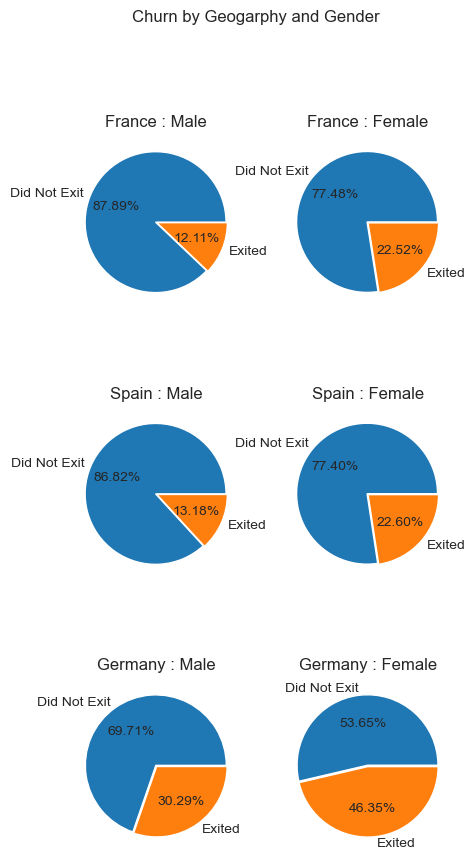

In [54]:
gen_target = df['Gender'].unique()
geo_target = df["Geography"].unique()

fix, ax = plt.subplots(nrows=3, ncols=2,figsize=(5,10))

gen_count = [df[(df["Gender"]==target)]['id'].count() for target in gen_target]

ax=ax.flatten()

#_ = ax[0].pie(gen_count, labels=gen_target, autopct = lambda x:"{:.0f} \n {:.2f} %".format(x*sum(gen_count)/100,x),explode=[0.01]*2)
#_ = ax[0].set_title("Data by Gender")

temp=0
for j in range(3):
    for i, target in enumerate (gen_target):
    

        classes = [df[(df['Gender']==target) & (df['Exited']==0) & (df['Geography']==geo_target[j])]['id'].count(), df[(df['Gender']==target) & (df['Exited']==1) & (df['Geography']==geo_target[j])]['id'].count()]

        label = ['Did Not Exit','Exited']

        _= ax[temp].pie(classes,labels = label, autopct = "%.2f%%", explode= [0.01]*len(label))
        _= ax[temp].set_title("{} : {}".format(geo_target[j],target))
        temp+=1
        plt.suptitle("Churn by Geogarphy and Gender")

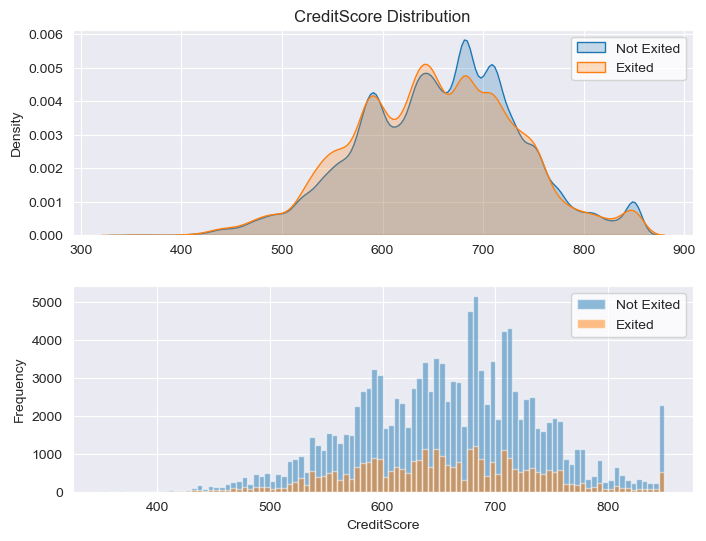

In [55]:
dens_hist_exit("CreditScore")

People having credit score in the range 660 - 720 are more likely to not exit

## Credit Score By Gender

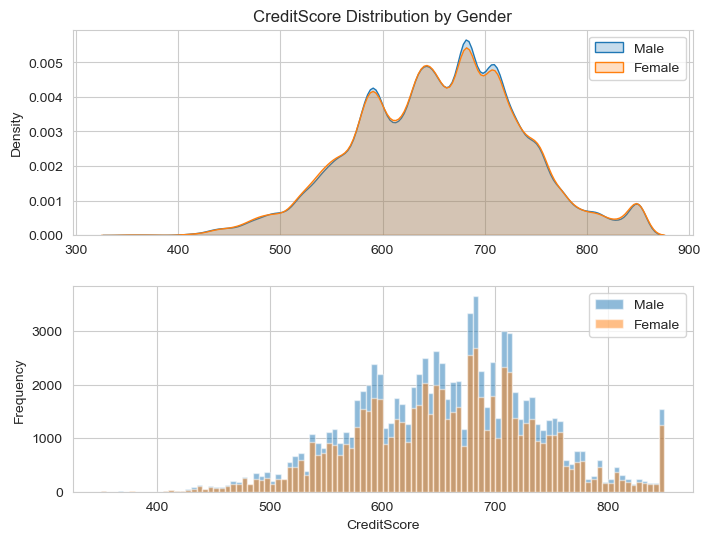

In [56]:
dens_hist_gen("CreditScore","Gender")

There is no clear distinction for Credit score distribution for different genders

## Credit Score By Geography

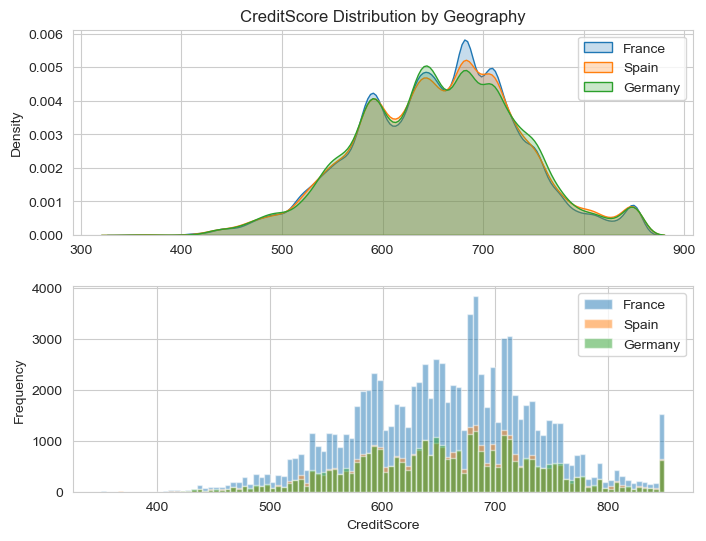

In [57]:
dens_hist_gen('CreditScore','Geography')

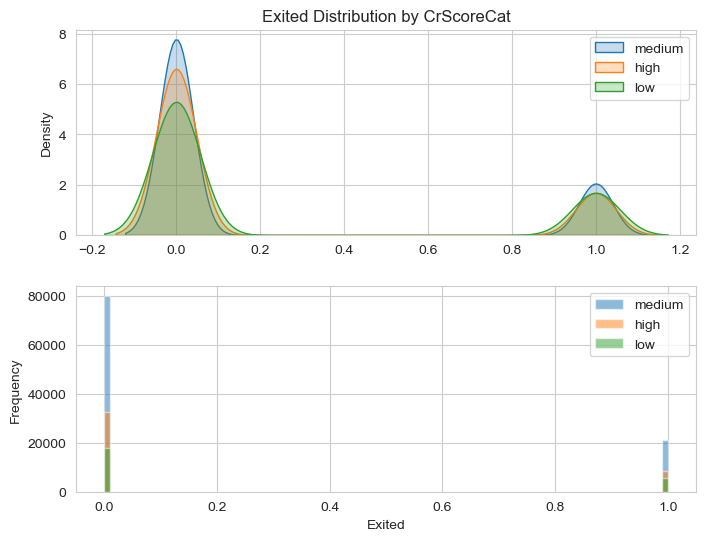

In [58]:
dens_hist_gen("Exited","CrScoreCat")

This shows that people having medium credit score is more likely to stay with the bank whereas those having low credit score terminates their services with the bank

In [59]:
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited CrScoreCat     AgeGroup  
0             181449.97       0     medium        Young  
1              49503.50       0     medium        Young  
2             184866.69       0     medium  Middle_Aged  
3              84560.88       0     medium        Young  
4              15068.83       0       high        Young  
...                 ...     ...        ...          ...  
165029        131834.75       0     medium        Young  
165030        131834.45       0       high        Young  
165031        127429.56       0        low        Young  
165032         71173.03       0        low        Young  
165033         61581.79       1       high        Young  

[165034 rows x 16 columns]

# Balance

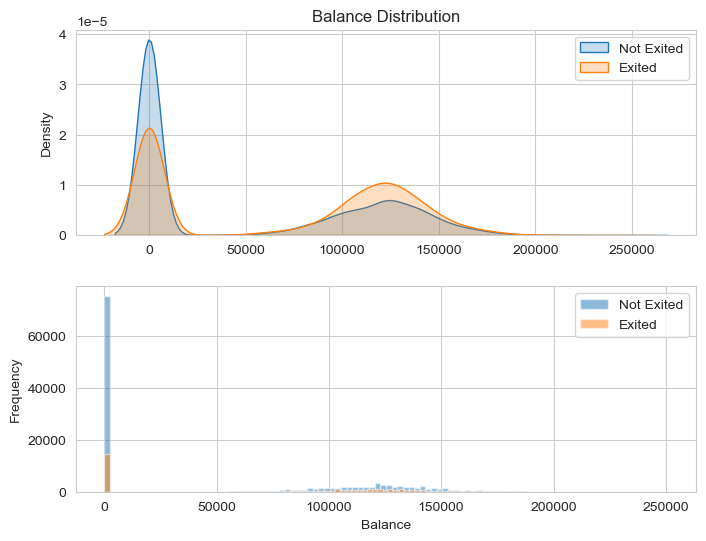

In [60]:
dens_hist_exit('Balance')

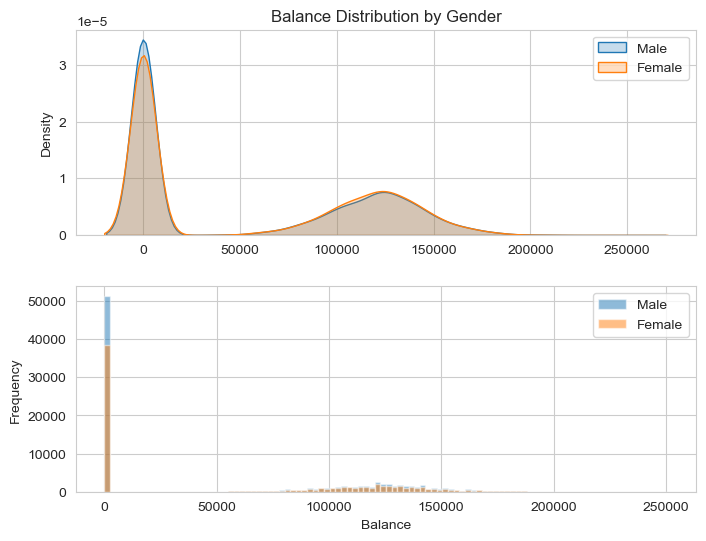

In [61]:
dens_hist_gen("Balance","Gender")

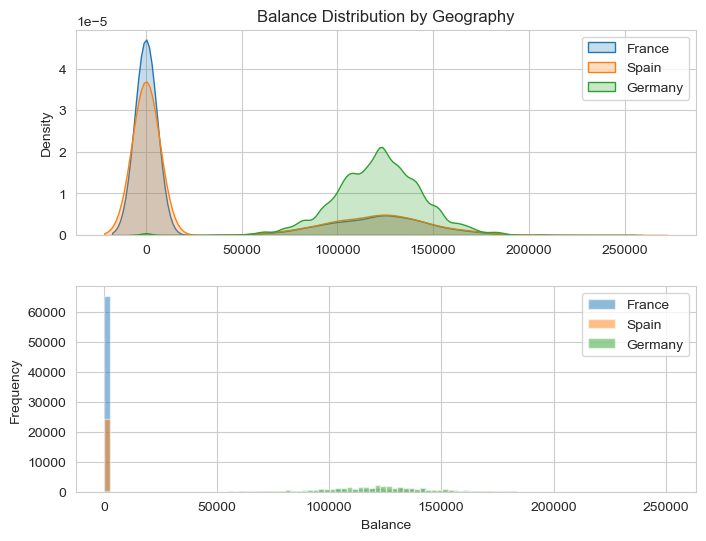

In [62]:
dens_hist_gen("Balance","Geography")

We see that Germany has more number of people having higher bank balance compared to France and Spain

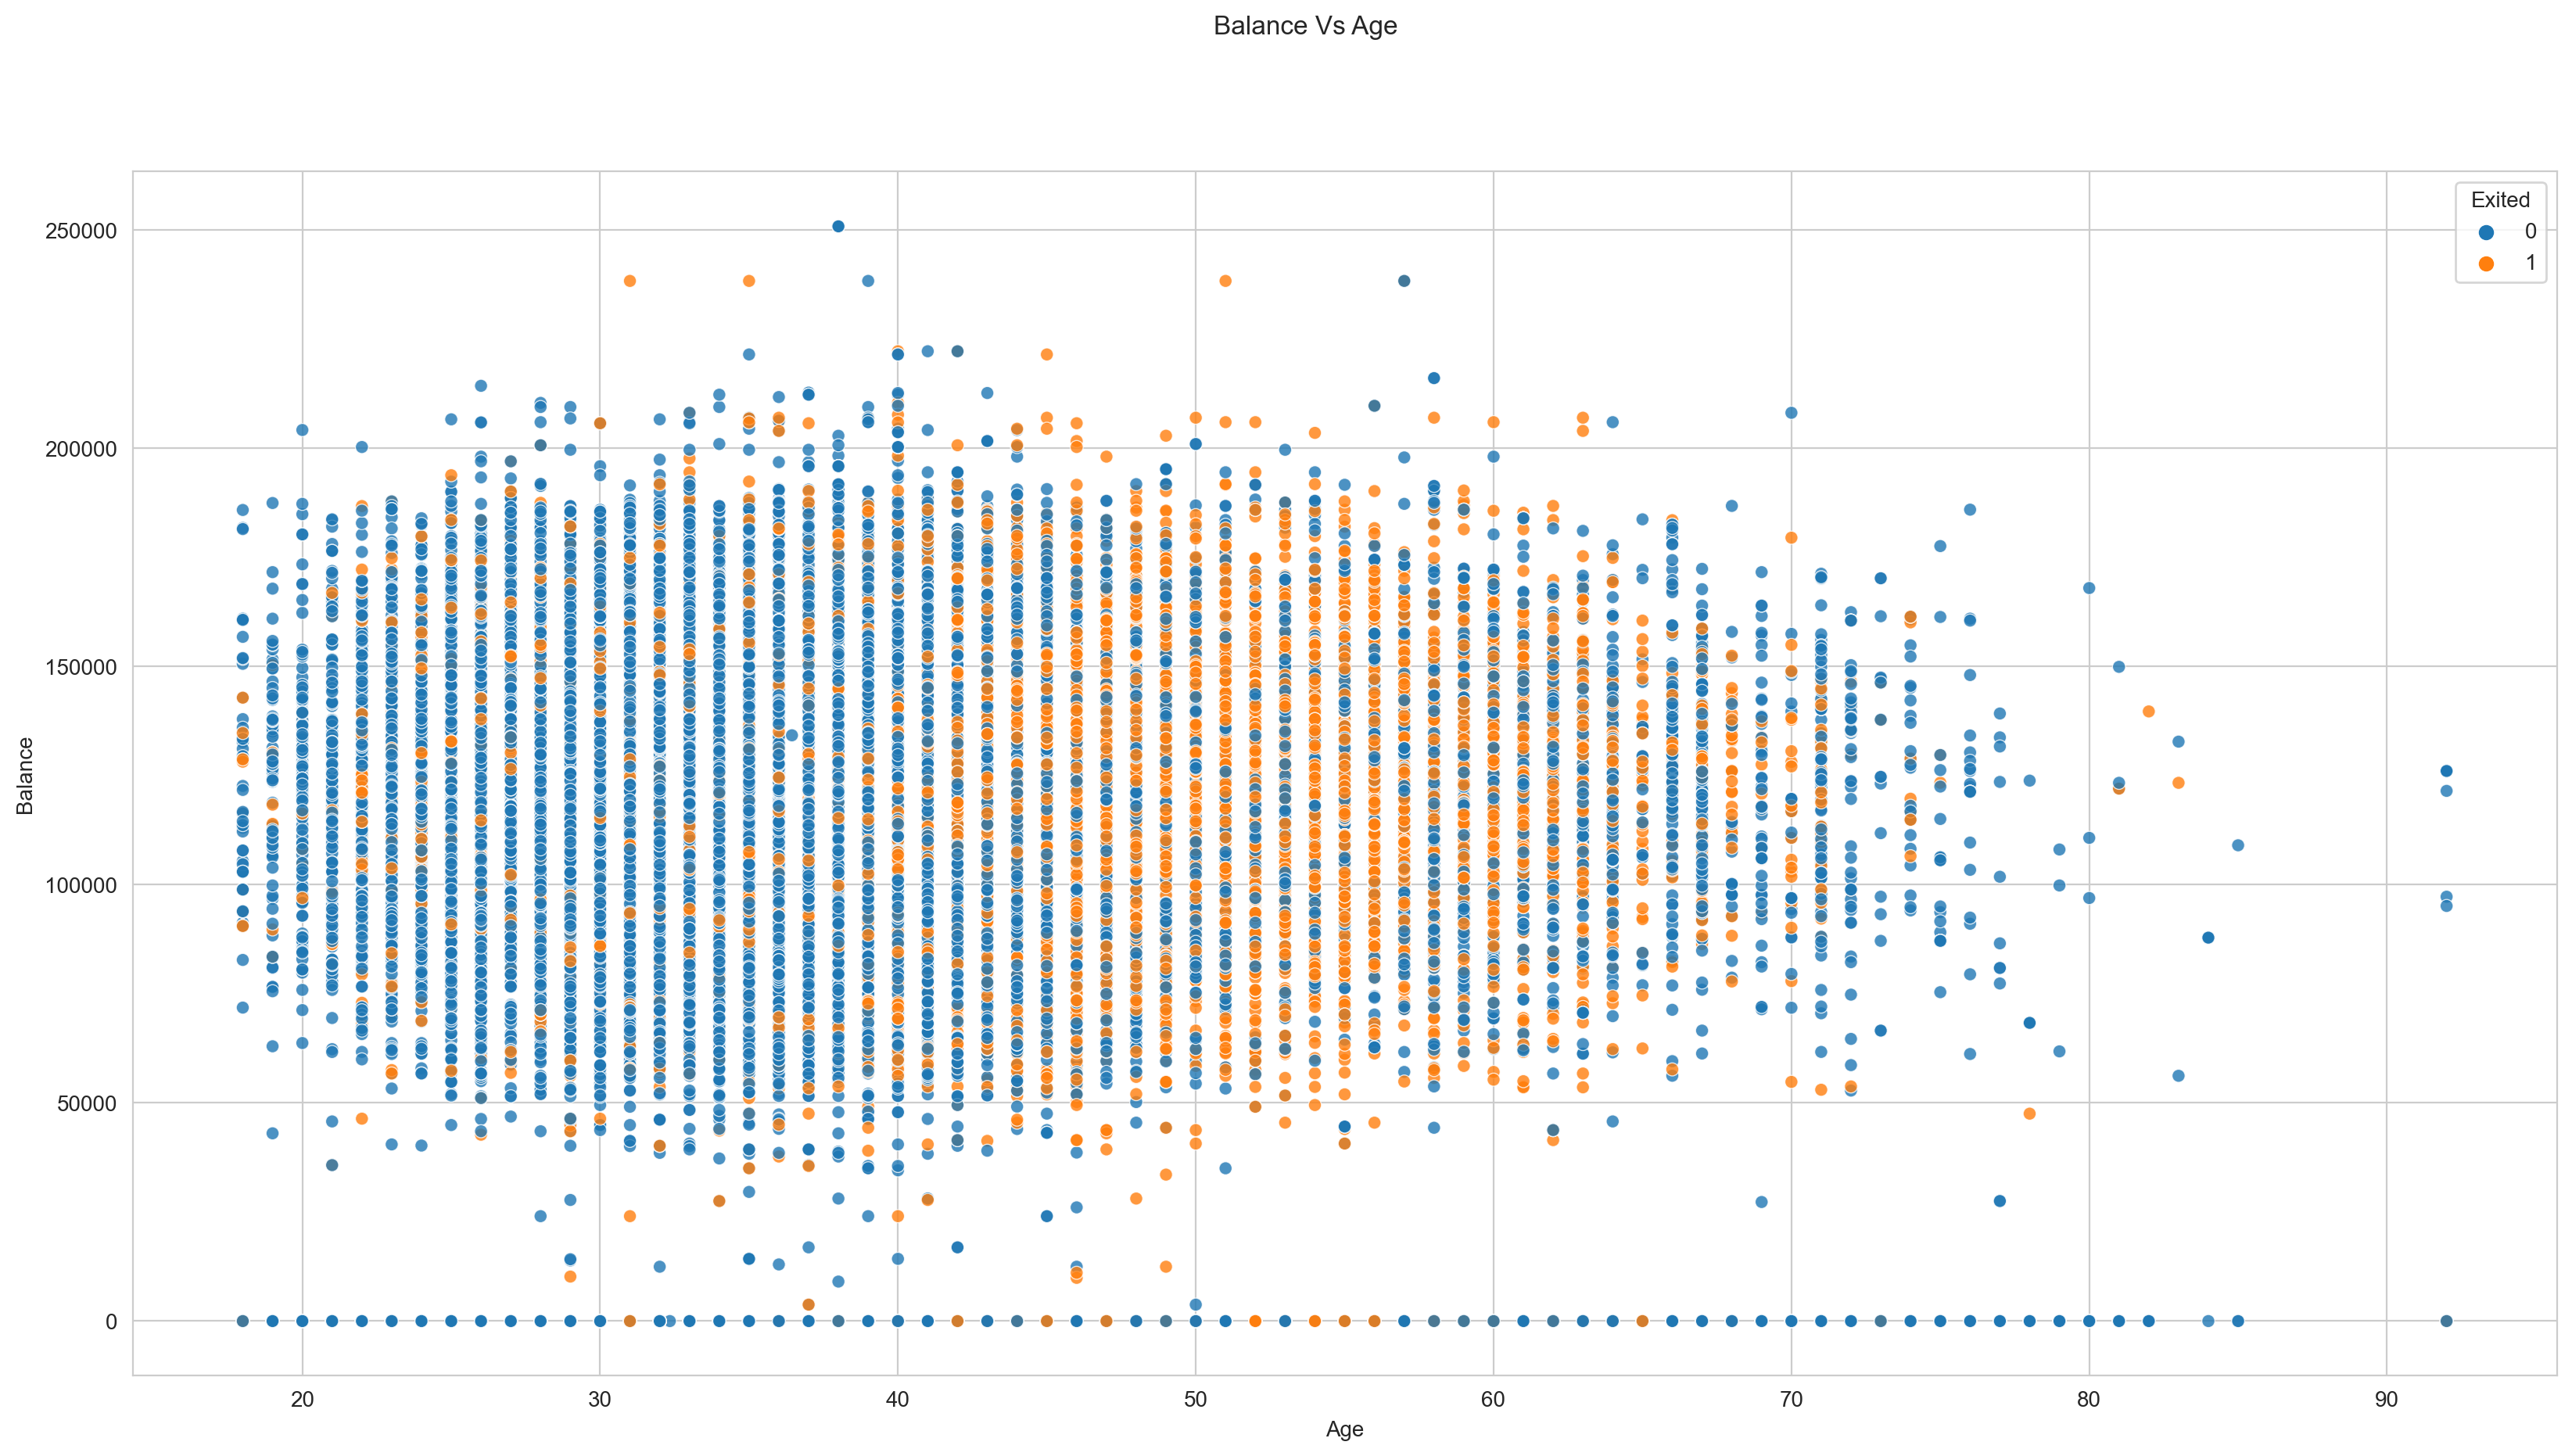

In [63]:
fix, ax = plt.subplots(figsize=(20,10),dpi=200)
_=sb.scatterplot(df,x='Age',y='Balance',hue='Exited',alpha=0.8)
_=plt.suptitle("Balance Vs Age")
#plt.plot(df["Age"],df["Balance"])


We see that people older than age 45 and having higher balance ( more than 50000) are more likely to terminate their services with the bank compared to young poeple having the same bank balance

# Estimated Salary

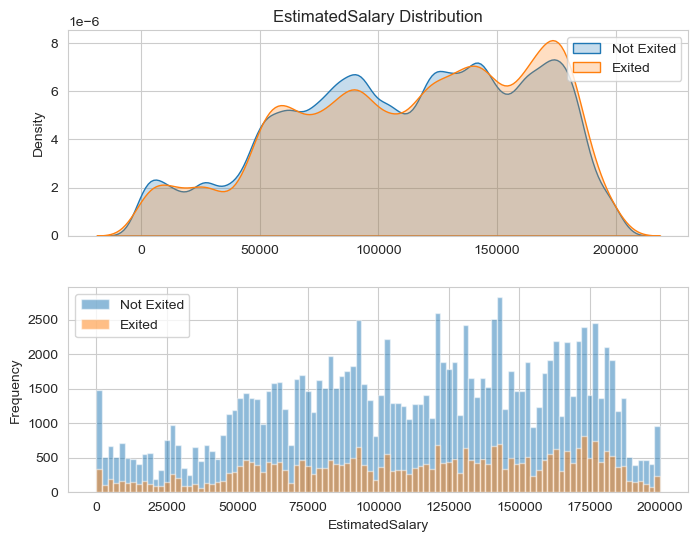

In [64]:
dens_hist_exit("EstimatedSalary")

## Estimated Salary By Gender

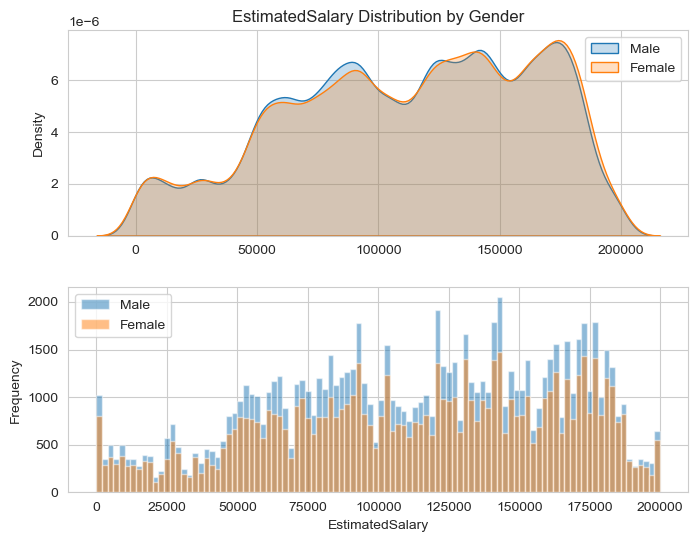

In [65]:
dens_hist_gen("EstimatedSalary","Gender")

## Estimated Salary by Geography


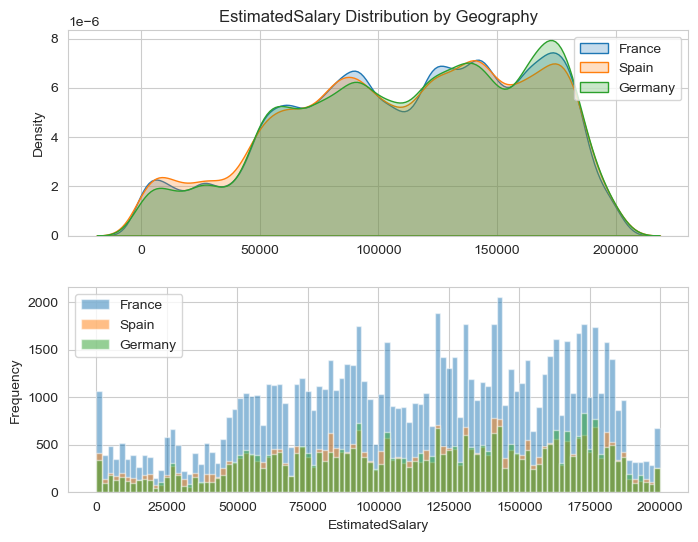

In [66]:
dens_hist_gen("EstimatedSalary","Geography")

#### There is no clear distinction for estimated salary based on geography or gender

# AGE

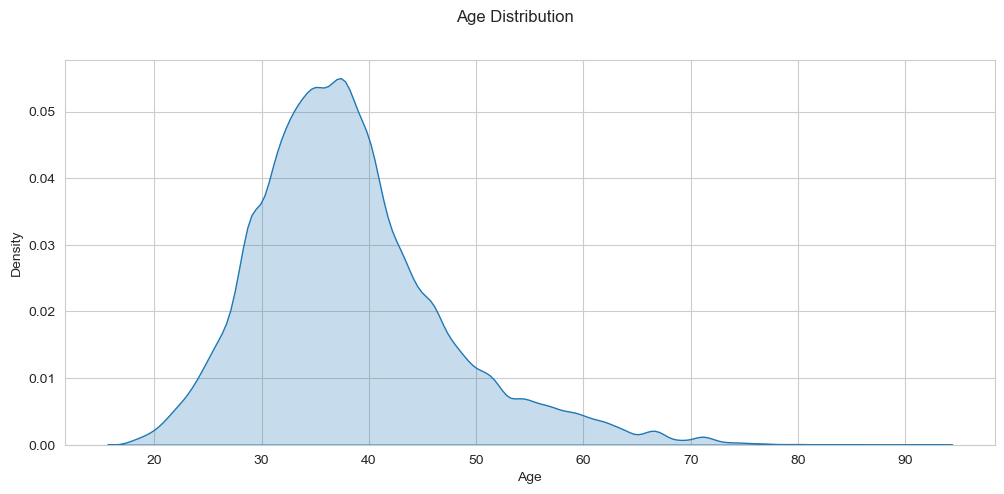

In [67]:
fig, ax = plt.subplots(figsize=(12,5))

sb.set_style("whitegrid")

_= sb.kdeplot(df["Age"],fill=True)
_= plt.suptitle('Age Distribution')

We see that most of our customer data lies between the age of 25-45

In [68]:
# Creating age groups

def age_group(age):
    if age<=35:
        return "Young"
    elif age<=45:
        return "Middle_Aged"
    elif age<=60:
        return "Senior"
    else:
        return "Old"

In [69]:
df["AgeGroup"]=df["Age"].apply(age_group)

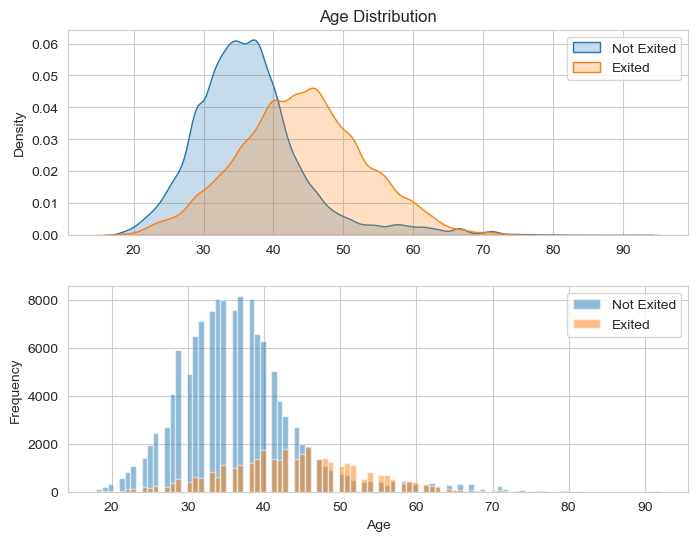

In [70]:
dens_hist_exit("Age")

There is a clear distinction between the age groups who terminate their services Vs those who stay with the bank. This is an important feature for Churn determination which was also showd by the correlation matrix

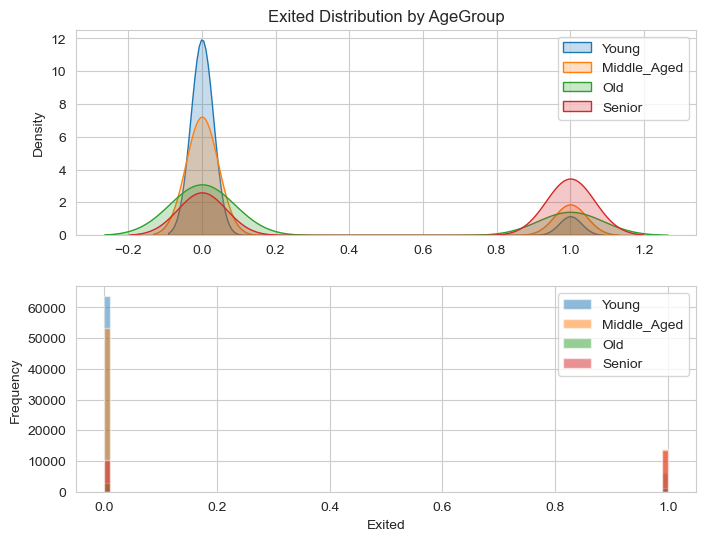

In [71]:
dens_hist_gen("Exited","AgeGroup")

We see that based on our defined age groups, Young and middle-Aged people are more likely to stay with the bank wheras senior people are more likely to exit

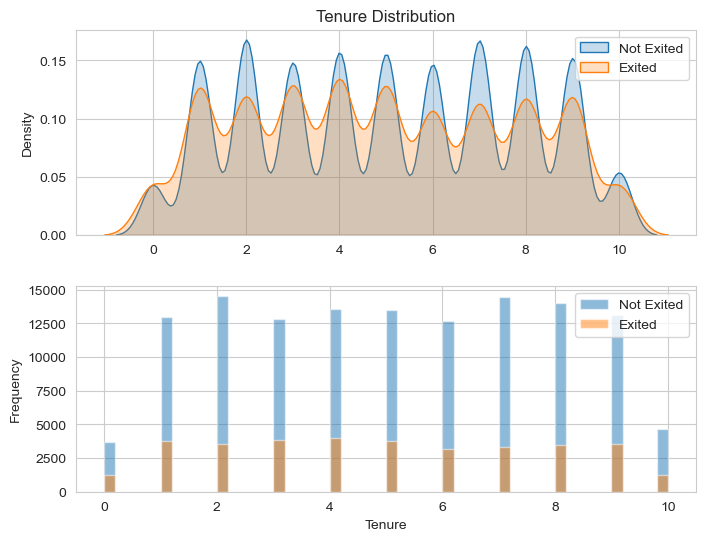

In [72]:
dens_hist_exit("Tenure",50)

This shows that people staying with bank for 1 to 9 years are more likely to stay with the bank

# Number of products


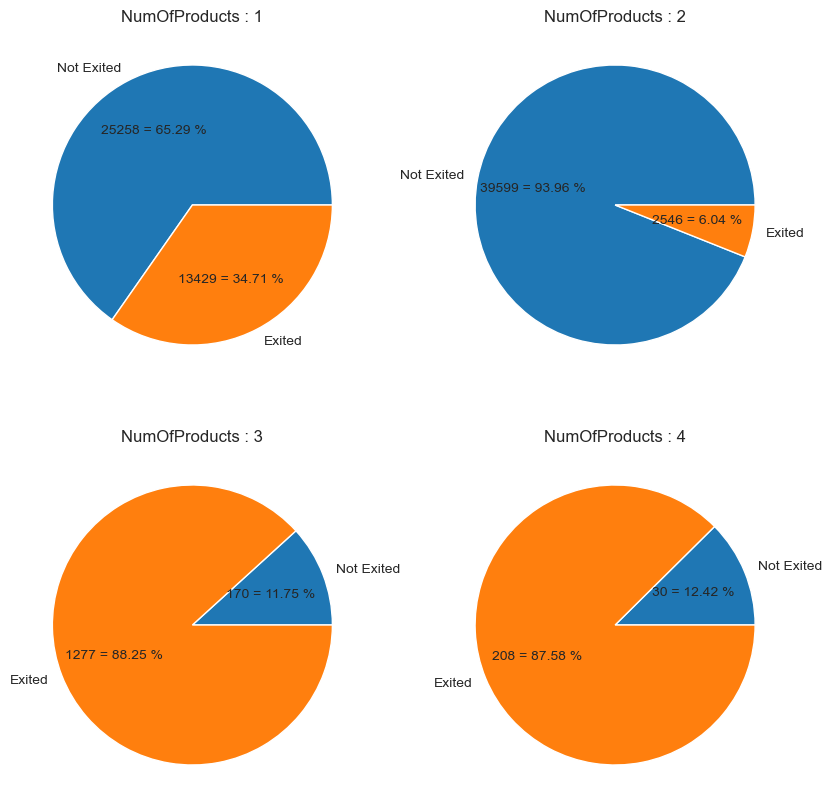

In [73]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax=ax.flatten()

for i in range(4):
    
    NOP_count=[df[(df["NumOfProducts"]== i+1) & (df["Exited"]==0)]["id"].count(),df[(df["NumOfProducts"]== i+1) & (df["Exited"]==1)]["id"].count()]
    NOP_label=["Not Exited","Exited"]
    _=ax[i].pie(NOP_count,labels=NOP_label,autopct=lambda x: "{:.0f} = {:.2f} %".format(x*sum(NOP_count)/200,x))
    _=ax[i].set_title("NumOfProducts : {}".format(i+1))

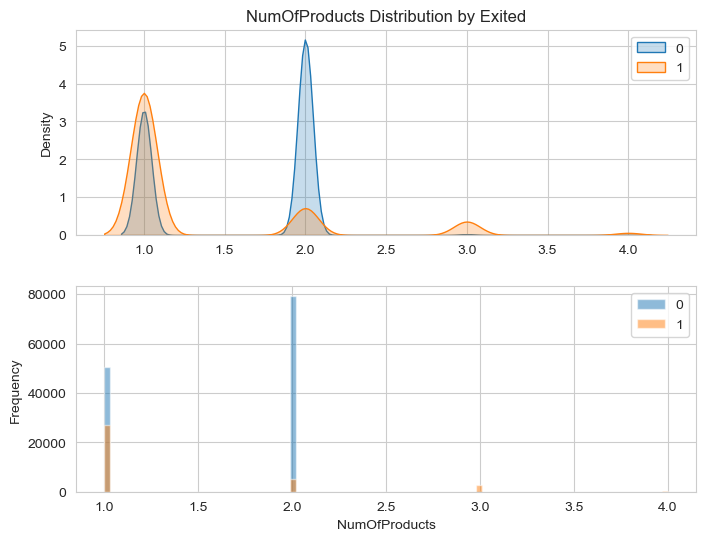

In [74]:
dens_hist_gen("NumOfProducts","Exited")

Larger part of the population who has 2 products is more likely to stay with bank whereas those having more than 2 products are more likely to exit

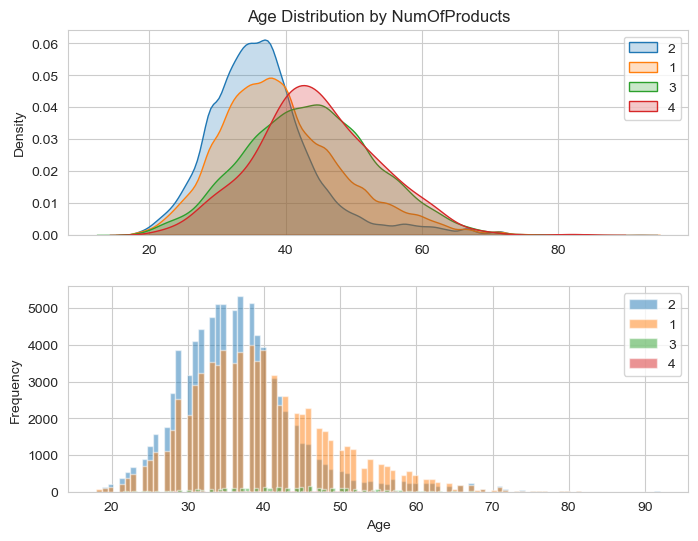

In [75]:
dens_hist_gen("Age","NumOfProducts")

- The distribution of age for people who own 2 products (blue) skews younger, with a peak around the late 20s to early 30s.
- Those with 1 product (orange) have a broader age distribution, peaking in the 30s and then slowly declining.
- The distribution for 3 products (green) and 4 products (red) are more similar to each other, both peaking around the mid-30s to 40s but with the 4 products curve having a slightly broader spread.

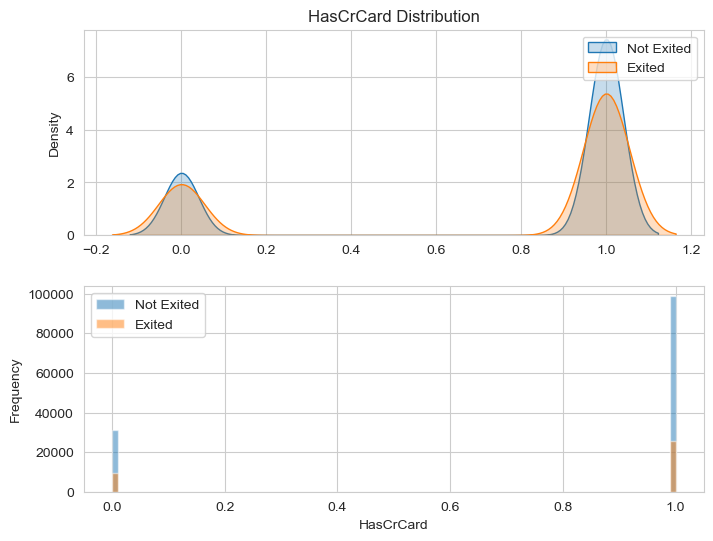

In [76]:
dens_hist_exit("HasCrCard")

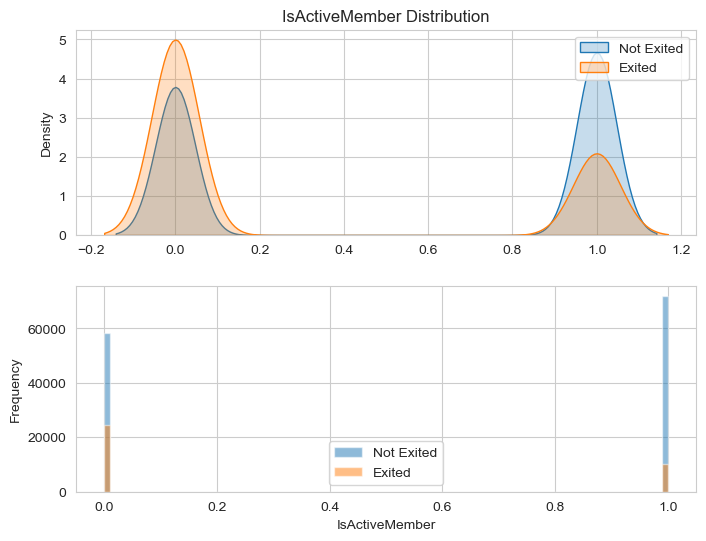

In [77]:
dens_hist_exit("IsActiveMember")

- From the bottom histogram, we can see that a larger number of active members have not exited (indicated by the blue bar at 1 on the x-axis). The number of non-active members (0 on the x-axis) who have not exited is also significant, but smaller than that of active members.


-  Conversely, a smaller number of active members have exited (orange bar at 1 on the x-axis), while the number of non-active members who have exited is relatively smaller.


- If we consider the density plot, it suggests that the proportion of members who have exited is greater in the non-active members than in the active members, which could indicate that active membership is potentially a factor in retaining members.

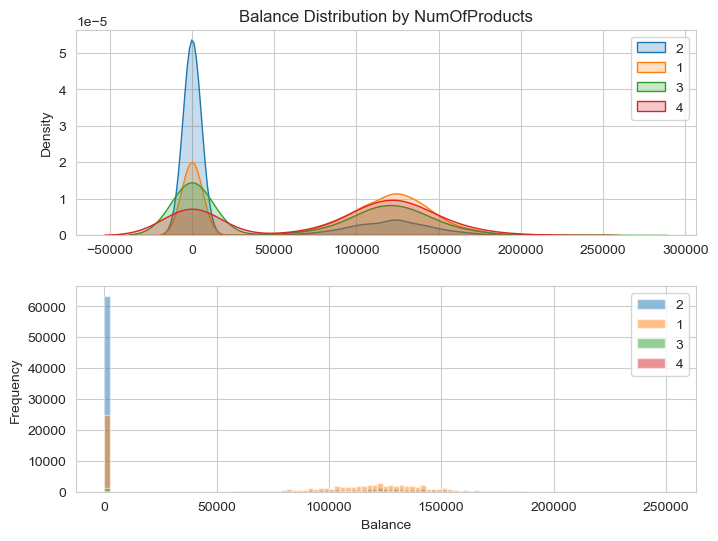

In [78]:
dens_hist_gen("Balance","NumOfProducts")

- Individuals owning 2 products (blue) have a sharp peak around a balance of 0, suggesting that a large number of these individuals either maintain a low balance or the data might be reflecting an account status (like zero-balance accounts).

-  The distributions for 1 product (orange), 3 products (green), and 4 products (red) are broader with peaks at higher balances compared to those with 2 products. This indicates that individuals with 1, 3, or 4 products tend to maintain higher account balances on average.

- Individuals with 1 product have both high frequency and high density at lower balances, indicating that they are the largest group within the population with a balance closer to 0.